In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1. IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2025-06-22 03:46:15.670386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750563975.863427      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750563975.919664      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/sensor-data/sensor_data.csv")

# Preview the data
print(df.head())
print(df.dtypes)

             timestamp  current1  voltage1  current2  voltage2  label
0  08-06-2025 04:08 PM      1.27      11.2      1.14      11.7      0
1  08-06-2025 03:45 PM      1.26      11.6      1.23      12.0      0
2  08-06-2025 07:34 PM      1.79      11.7      1.00      11.9      1
3  08-06-2025 03:52 PM      1.25      12.4      1.09      11.7      0
4  08-06-2025 12:52 PM      1.40      11.2      1.20      11.2      0
timestamp     object
current1     float64
voltage1     float64
current2     float64
voltage2     float64
label          int64
dtype: object


In [4]:
from sklearn.preprocessing import MinMaxScaler

features = ['current1', 'voltage1', 'current2', 'voltage2']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [5]:
import numpy as np

sequence_length = 10
X = []
y = []

for i in range(len(df) - sequence_length):
    X.append(df[features].iloc[i:i + sequence_length].values)
    y.append(df['label'].iloc[i + sequence_length - 1])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # Should be (samples, 10, 4)
print("y shape:", y.shape)  # Should be (samples,)

X shape: (490, 10, 4)
y shape: (490,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(245, 10, 4) (245, 10, 4)
(245,) (245,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential([
    LSTM(64, input_shape=(10, 4)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

I0000 00:00:1750563988.618048      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750563988.618708      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1750563992.702265      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5382 - loss: 0.6900 - val_accuracy: 0.6735 - val_loss: 0.6848
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6145 - loss: 0.6826 - val_accuracy: 0.5061 - val_loss: 0.6796
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5274 - loss: 0.6768 - val_accuracy: 0.6327 - val_loss: 0.6724
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6892 - loss: 0.6705 - val_accuracy: 0.7551 - val_loss: 0.6651
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.6636 - val_accuracy: 0.7469 - val_loss: 0.6573
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7687 - loss: 0.6538 - val_accuracy: 0.7102 - val_loss: 0.6478
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7315 - loss: 0.6361 - val_accuracy: 0.7673 - val_loss: 0.6349
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7933 - loss: 0.6315 - val_accuracy: 0.7469 - val_loss: 0.6210
Epoch 9/20


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       122
           1       0.81      0.98      0.89       123

    accuracy                           0.87       245
   macro avg       0.89      0.87      0.87       245
weighted avg       0.89      0.87      0.87       245



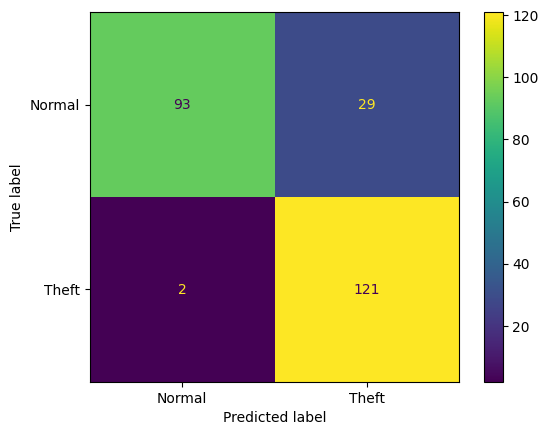

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Normal", "Theft"]).plot()

In [9]:
# Get predicted probabilities (confidence scores)
y_prob = model.predict(X_test)  # Values between 0 and 1

# Show first 10 scores alongside true labels
for i in range(10):
    print(f"True: {y_test[i]}, Predicted: {y_prob[i][0]:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
True: 1, Predicted: 0.8998
True: 0, Predicted: 0.0382
True: 1, Predicted: 0.6560
True: 1, Predicted: 0.7183
True: 1, Predicted: 0.8433
True: 1, Predicted: 0.6045
True: 1, Predicted: 0.5868
True: 1, Predicted: 0.9208
True: 1, Predicted: 0.9084
True: 0, Predicted: 0.1919


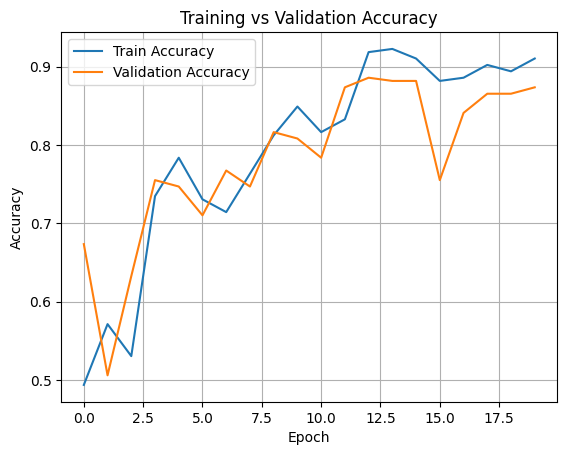

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
model.save("model.h5")

In [12]:
import os
os.listdir("/kaggle/working")

['model.h5', '__notebook__.ipynb']

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.2%}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8844 - loss: 0.3040 
✅ Test Accuracy: 87.35%


In [14]:
# Accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Final Test Accuracy: {accuracy:.4f}")

# Classification report
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Final Test Accuracy: 0.8735
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       122
           1       0.81      0.98      0.89       123

    accuracy                           0.87       245
   macro avg       0.89      0.87      0.87       245
weighted avg       0.89      0.87      0.87       245

